In [1]:
import qspectra as qs
import numpy as np

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
ham = qs.ElectronicHamiltonian(np.array([[12881, 120], [120, 12719]]),
                               bath=qs.DebyeBath(qs.CM_K * 77, 35, 106),
                               dipoles=[[1, 0, 0], [2 * np.cos(.3), 2 * np.sin(.3), 0]])

red_dimer = qs.RedfieldModel(ham, hilbert_subspace='ge', discard_imag_corr=True, unit_convert=qs.CM_FS)
heom_dimer = qs.HEOMModel(ham, hilbert_subspace='ge', unit_convert=qs.CM_FS, level_cutoff=3, low_temp_corr=False)


In [78]:
Omega = [-500., -200., -90., 1., 21., 60., 80., 130., 200., 300., 400., 500., 600., 800., 1100., 1500.] # frequencies of PMs
huang = [-2.5133e-03, -7.5398e-03, -2.5133e-02, 5.0265e+01, 2.2619e+00, 4.5239e-02, 2.7646e-01,
          9.2991e-03, 2.2619e-02, 1.5080e-02, 3.0159e-03, 
          3.5186e-03, 2.8274e-04, 1.7593e-03, 4.3982e-04, 4.3982e-04] # Huang-Rhys factors of PMs (couplings to PMs)
gamma = [500., 100., 50., 50., 50., 50., 80., 40., 80., 150., 200., 200., 80., 250., 200., 300.] # dampings of the PMs

n_sites = ham.n_sites
numb_pm = len(Omega)
on = np.ones(n_sites, complex)

Omega = np.array([Omega[pm]*on for pm in range(numb_pm)])
huang = np.array([huang[pm]*on for pm in range(numb_pm)])
gamma = np.array([gamma[pm]*on for pm in range(numb_pm)])

zofe_ham = qs.ElectronicHamiltonian(
    ham.H('e'), bath=qs.PseudomodeBath(numb_pm, Omega, gamma, huang), 
    dipoles=ham.dipoles)
zofe_dimer = qs.ZOFEModel(zofe_ham, hilbert_subspace='ge', unit_convert=qs.CM_FS)


In [79]:
f, X = qs.absorption_spectra(heom_dimer, 10000)
f2, X2 = qs.absorption_spectra(red_dimer, 10000)
f3, X3 = qs.absorption_spectra(zofe_dimer, 10000)


calculating ADO 0
[[0 0]
 [0 0]]

calculating ADO 1
[[0 0]
 [0 1]]

calculating ADO 2
[[0 0]
 [1 0]]

calculating ADO 3
[[0 1]
 [0 0]]

calculating ADO 4
[[1 0]
 [0 0]]

calculating ADO 5
[[0 0]
 [0 2]]

calculating ADO 6
[[0 0]
 [1 1]]

calculating ADO 7
[[0 0]
 [2 0]]

calculating ADO 8
[[0 1]
 [0 1]]

calculating ADO 9
[[0 1]
 [1 0]]

calculating ADO 10
[[0 2]
 [0 0]]

calculating ADO 11
[[1 0]
 [0 1]]

calculating ADO 12
[[1 0]
 [1 0]]

calculating ADO 13
[[1 1]
 [0 0]]

calculating ADO 14
[[2 0]
 [0 0]]


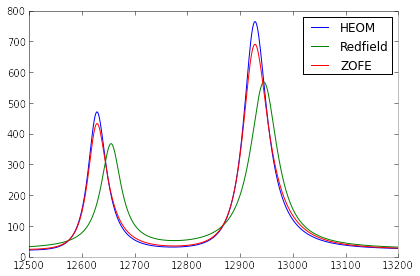

In [80]:
plt.plot(f, X, label='HEOM')
plt.plot(f2, X2, label='Redfield')
plt.plot(f3, X3, label='ZOFE')
plt.xlim(12500, 13200)
plt.legend()